In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import sys
import pandas as pd
import geopandas as gpd
import xarray as xr
import io, requests
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import glob
from string import ascii_lowercase as alc

### Just to remove warnings to prettify the notebook. 
import warnings
warnings.filterwarnings("ignore")

In [2]:
### consts
path_to_ccm_results = './data/processed/'

In [3]:
eco_regions = ['Middle Rockies',
               'Klamath Mountains',
               'Sierra Nevada',
               'Wasatch and Uinta Mountains',
               'Southern Rockies',
               'Idaho Batholith',
               'Columbia Mountains/Northern Rockies',
               'Canadian Rockies',
               'North Cascades',
               'Blue Mountains',
               'Cascades',
               'Eastern Cascades Slopes and Foothills',
               'Central Basin and Range',
               'Arizona/New Mexico Mountains',
               'Northern Basin and Range']

In [4]:
# read in NA ECO_LEVEL 3 raster files
gdf = gpd.read_file('../data/NA_CEC_Eco_Level3/')

wus_eco = gdf[gdf['NA_L3NAME'].isin(eco_regions)]

In [5]:
# Define the CartoPy CRS object.
crs = ccrs.PlateCarree(central_longitude=180)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
wus_eco = wus_eco.to_crs(crs_proj4)

---

In [6]:
ccm_results_flist = np.sort(glob.glob(path_to_ccm_results+'*.nc'))

In [7]:
ccm_results_flist

array(['./data/processed/ccm_SLP_tau_1.nc',
       './data/processed/ccm_SLP_tau_3.nc',
       './data/processed/ccm_SLP_tau_6.nc',
       './data/processed/ccm_SST_tau_1.nc',
       './data/processed/ccm_SST_tau_3.nc',
       './data/processed/ccm_SST_tau_6.nc'], dtype='<U33')

In [8]:
alc[0]

'a'

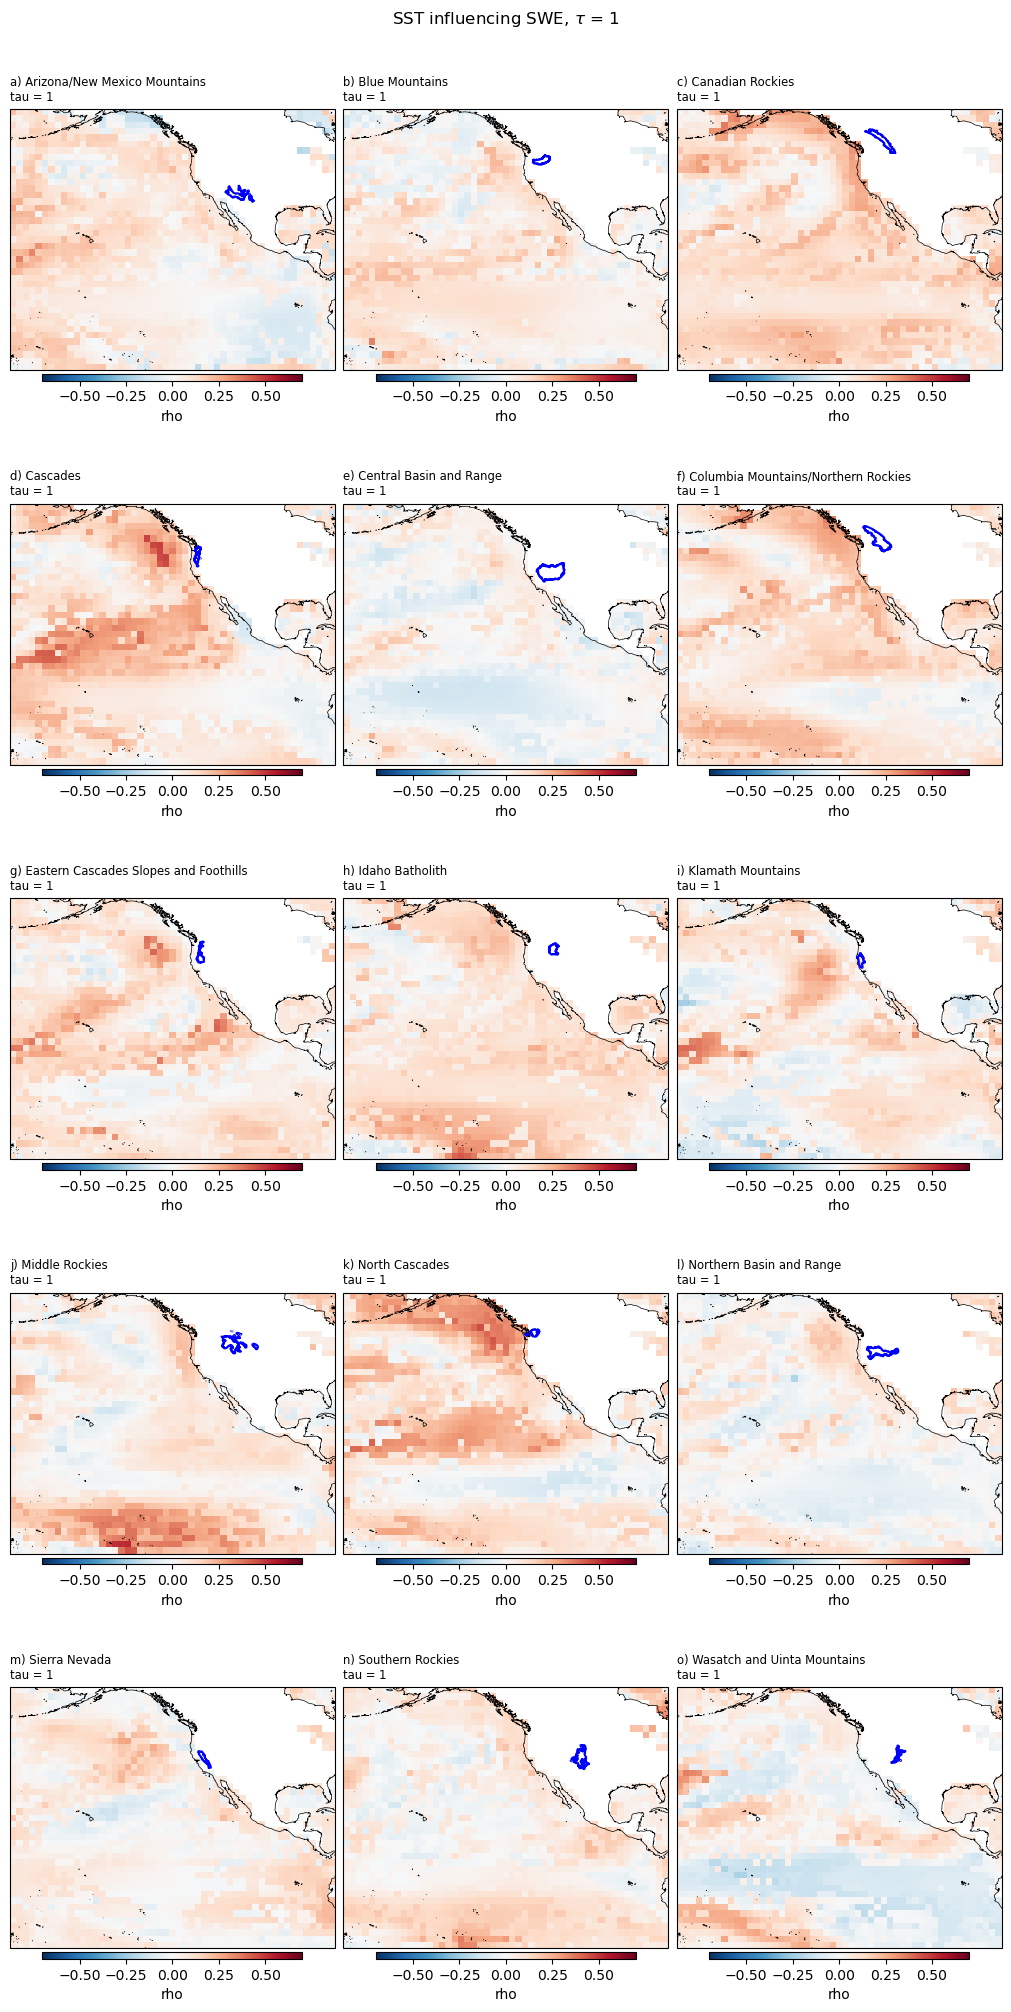

In [24]:
# def plot_ccm(f):
f = ccm_results_flist[3]

lag = f.split('_')[3].split('.')[0]
ccm_xr = xr.open_dataset(f)
fig = plt.figure(figsize=(10, 20), constrained_layout=True)
# create gridspec
gs = fig.add_gridspec(5,3, height_ratios=[1,1,1,1,1],
                      width_ratios=[1,1,1])

cbar_kwargs = {'shrink':0.8, 'aspect':40,
               'orientation':'horizontal', 'pad':0.01}

for i in range(15):
    eco_name = str(ccm_xr.isel(eco_region=i).eco_region.values)
    sub = wus_eco[wus_eco['NA_L3NAME']==eco_name]
    
    ax = fig.add_subplot(gs[i],
                         projection=ccrs.PlateCarree(central_longitude=180))
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)
    ccm_xr.isel(eco_region=i).rho.plot(ax=ax,
                                       cmap='RdBu_r',
                                       vmin=-0.7, vmax=0.7,
                                       transform=ccrs.PlateCarree(),
                                       cbar_kwargs=cbar_kwargs)
    sub.boundary.plot(ax=ax, color='b')
    ax.set_title('')
    ax.set_title('{}) {}\ntau = {}'.format(alc[i], eco_name, lag), loc='left', fontsize='small')
plt.suptitle(fr'SST influencing SWE, $\tau$ = {lag}')
plt.savefig('./figs/ccm_sst_swe_lag1.png', bbox_inches='tight', facecolor='w')
plt.show()

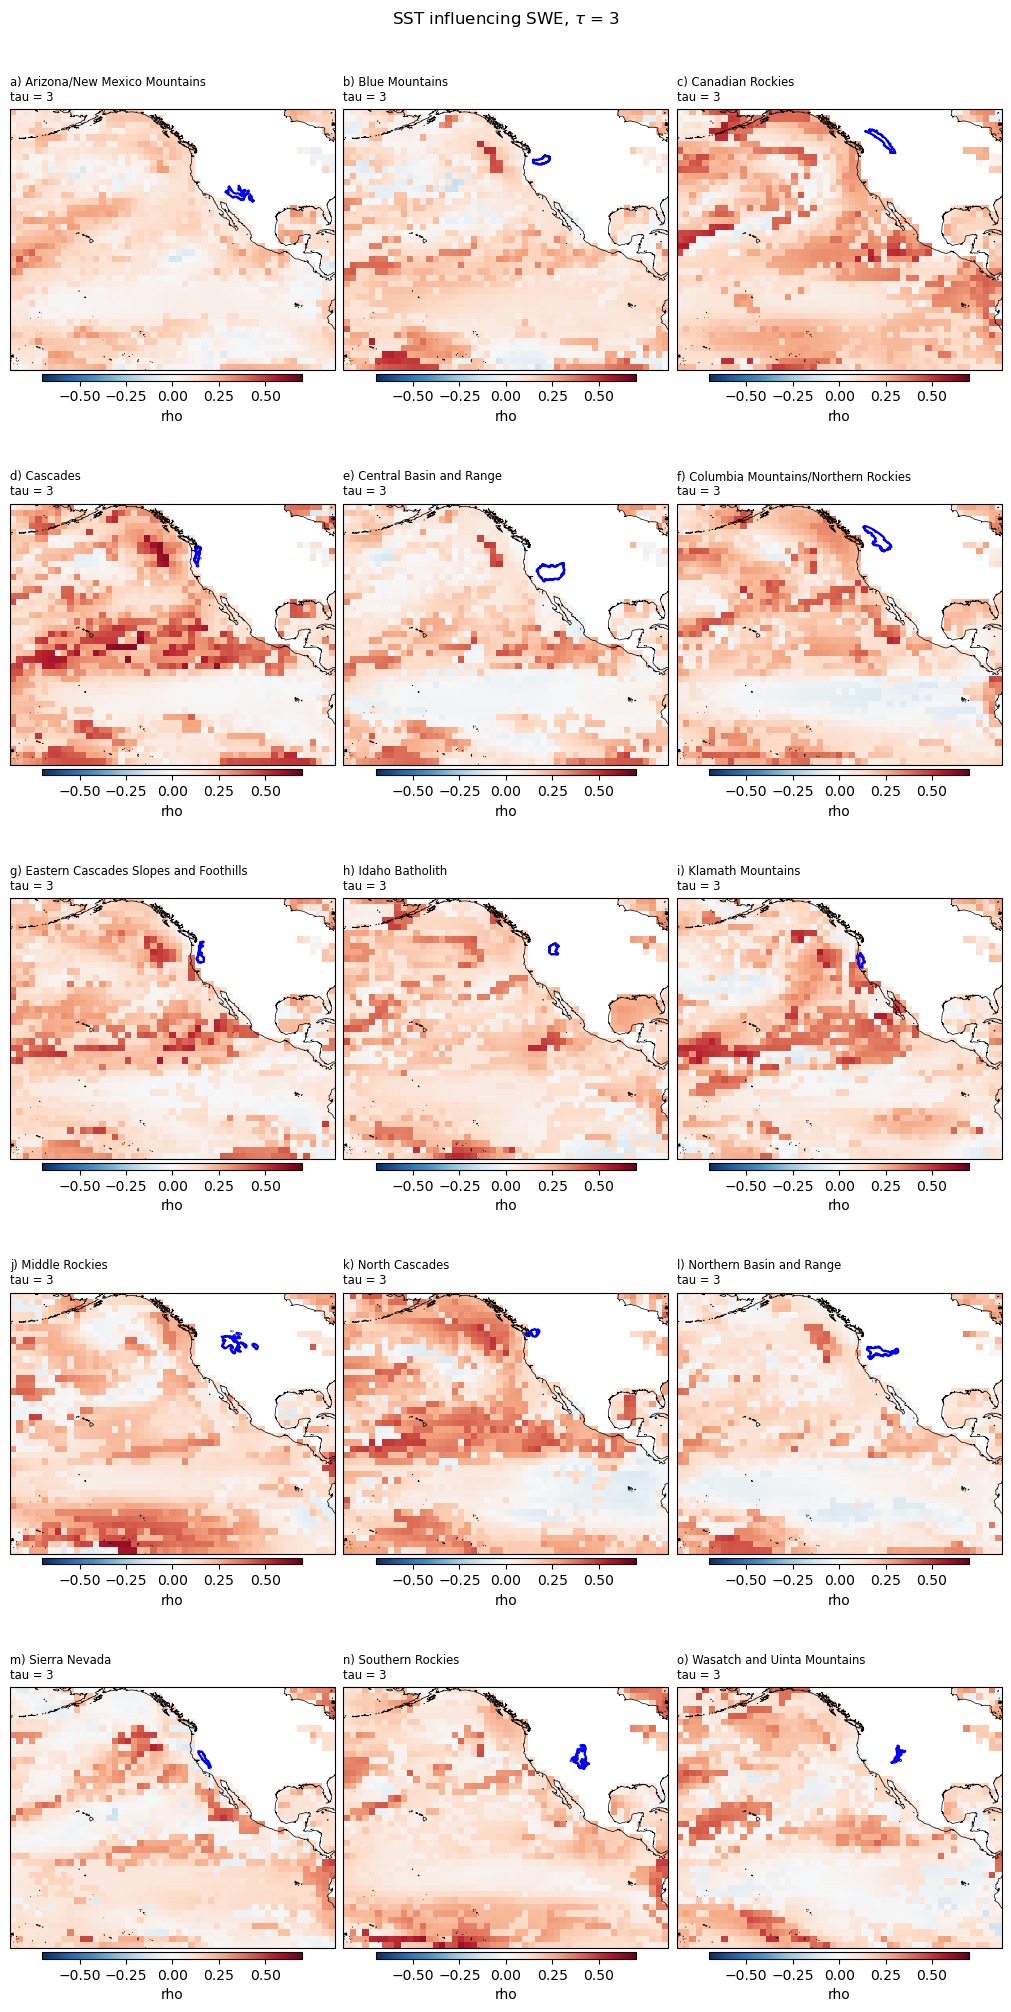

In [25]:
# def plot_ccm(f):
f = ccm_results_flist[4]

lag = f.split('_')[3].split('.')[0]
ccm_xr = xr.open_dataset(f)
fig = plt.figure(figsize=(10, 20), constrained_layout=True)
# create gridspec
gs = fig.add_gridspec(5,3, height_ratios=[1,1,1,1,1],
                      width_ratios=[1,1,1])

cbar_kwargs = {'shrink':0.8, 'aspect':40,
               'orientation':'horizontal', 'pad':0.01}

for i in range(15):
    eco_name = str(ccm_xr.isel(eco_region=i).eco_region.values)
    sub = wus_eco[wus_eco['NA_L3NAME']==eco_name]
    
    ax = fig.add_subplot(gs[i],
                         projection=ccrs.PlateCarree(central_longitude=180))
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)
    ccm_xr.isel(eco_region=i).rho.plot(ax=ax,                                       
                                       cmap='RdBu_r',
                                       vmin=-0.7, vmax=0.7,
                                       transform=ccrs.PlateCarree(),
                                       cbar_kwargs=cbar_kwargs)
    sub.boundary.plot(ax=ax, color='b')
    ax.set_title('')
    ax.set_title('{}) {}\ntau = {}'.format(alc[i], eco_name, lag), loc='left', fontsize='small')
plt.suptitle(fr'SST influencing SWE, $\tau$ = {lag}')
plt.savefig('./figs/ccm_sst_swe_lag3.png', bbox_inches='tight', facecolor='w')
plt.show()

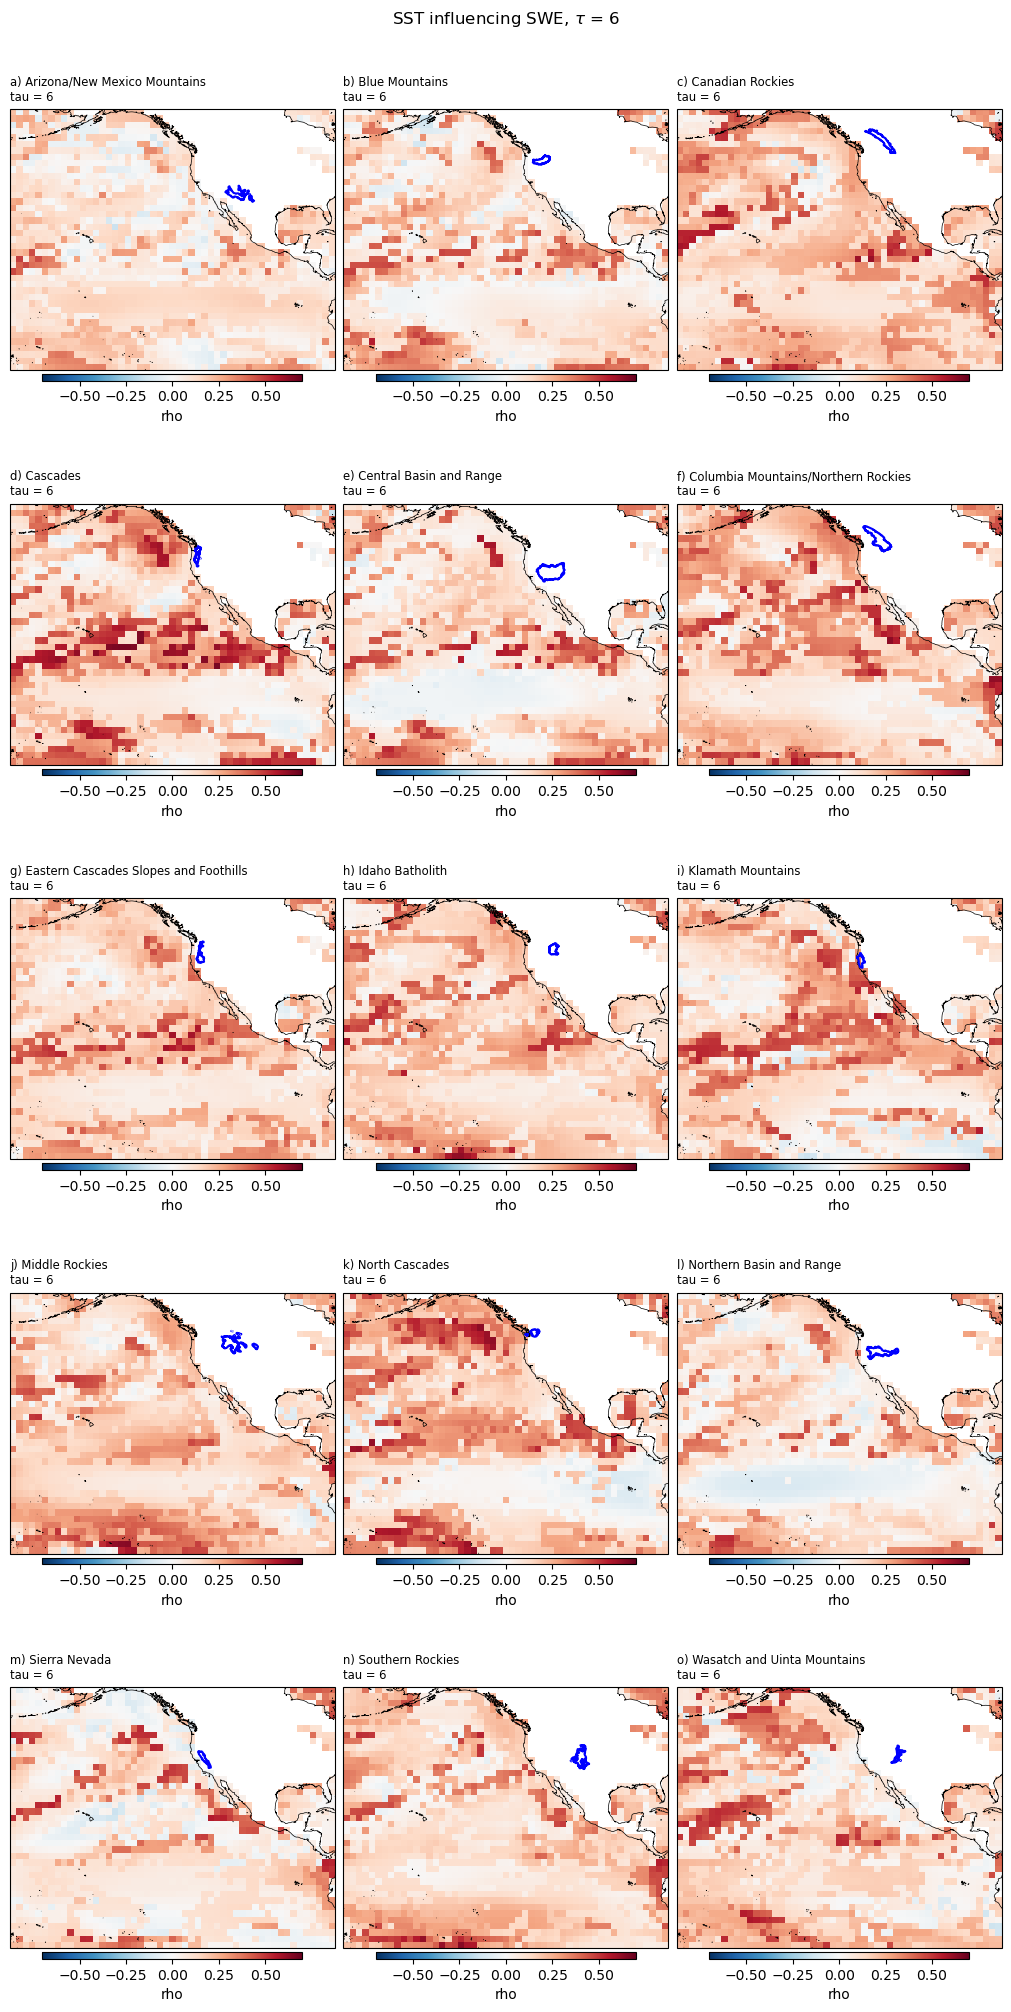

In [26]:
# def plot_ccm(f):
f = ccm_results_flist[5]

lag = f.split('_')[3].split('.')[0]
ccm_xr = xr.open_dataset(f)
fig = plt.figure(figsize=(10, 20), constrained_layout=True)
# create gridspec
gs = fig.add_gridspec(5,3, height_ratios=[1,1,1,1,1],
                      width_ratios=[1,1,1])

cbar_kwargs = {'shrink':0.8, 'aspect':40,
               'orientation':'horizontal', 'pad':0.01}

for i in range(15):
    eco_name = str(ccm_xr.isel(eco_region=i).eco_region.values)
    sub = wus_eco[wus_eco['NA_L3NAME']==eco_name]
    
    ax = fig.add_subplot(gs[i],
                         projection=ccrs.PlateCarree(central_longitude=180))
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)
    ccm_xr.isel(eco_region=i).rho.plot(ax=ax,
                                       cmap='RdBu_r',
                                       vmin=-0.7, vmax=0.7,
                                       transform=ccrs.PlateCarree(),
                                       cbar_kwargs=cbar_kwargs)
    sub.boundary.plot(ax=ax, color='b')
    ax.set_title('')
    ax.set_title('{}) {}\ntau = {}'.format(alc[i], eco_name, lag), loc='left', fontsize='small')
plt.suptitle(fr'SST influencing SWE, $\tau$ = {lag}')
plt.savefig('./figs/ccm_sst_swe_lag6.png', bbox_inches='tight', facecolor='w')
plt.show()

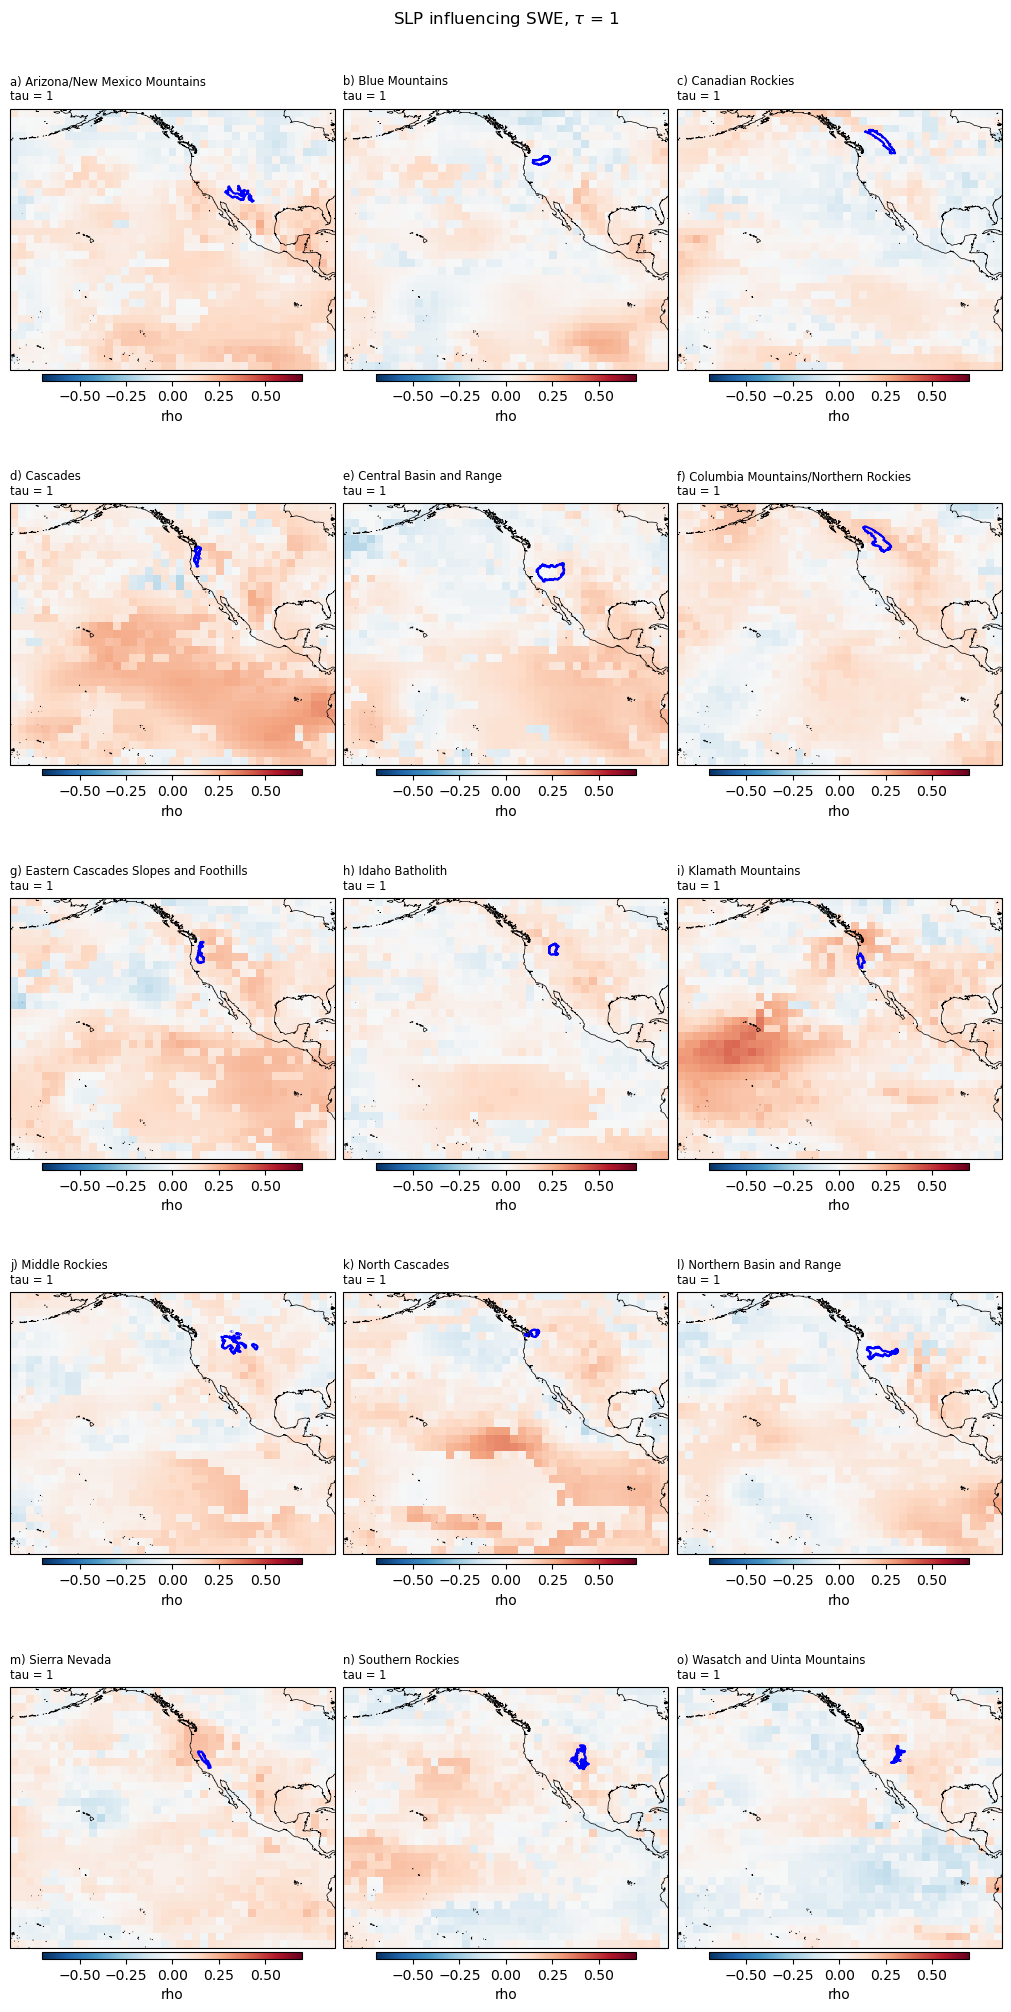

In [27]:
# def plot_ccm(f):
f = ccm_results_flist[0]

lag = f.split('_')[3].split('.')[0]
ccm_xr = xr.open_dataset(f)
fig = plt.figure(figsize=(10, 20), constrained_layout=True)
# create gridspec
gs = fig.add_gridspec(5,3, height_ratios=[1,1,1,1,1],
                      width_ratios=[1,1,1])

cbar_kwargs = {'shrink':0.8, 'aspect':40,
               'orientation':'horizontal', 'pad':0.01}

for i in range(15):
    eco_name = str(ccm_xr.isel(eco_region=i).eco_region.values)
    sub = wus_eco[wus_eco['NA_L3NAME']==eco_name]
    
    ax = fig.add_subplot(gs[i],
                         projection=ccrs.PlateCarree(central_longitude=180))
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)
    ccm_xr.isel(eco_region=i).rho.plot(ax=ax,                                       
                                       cmap='RdBu_r',
                                       vmin=-0.7, vmax=0.7,
                                       transform=ccrs.PlateCarree(),
                                       cbar_kwargs=cbar_kwargs)
    sub.boundary.plot(ax=ax, color='b')
    ax.set_title('')
    ax.set_title('{}) {}\ntau = {}'.format(alc[i], eco_name, lag), loc='left', fontsize='small')
plt.suptitle(fr'SLP influencing SWE, $\tau$ = {lag}')
plt.savefig('./figs/ccm_slp_swe_lag1.png', bbox_inches='tight', facecolor='w')
plt.show()

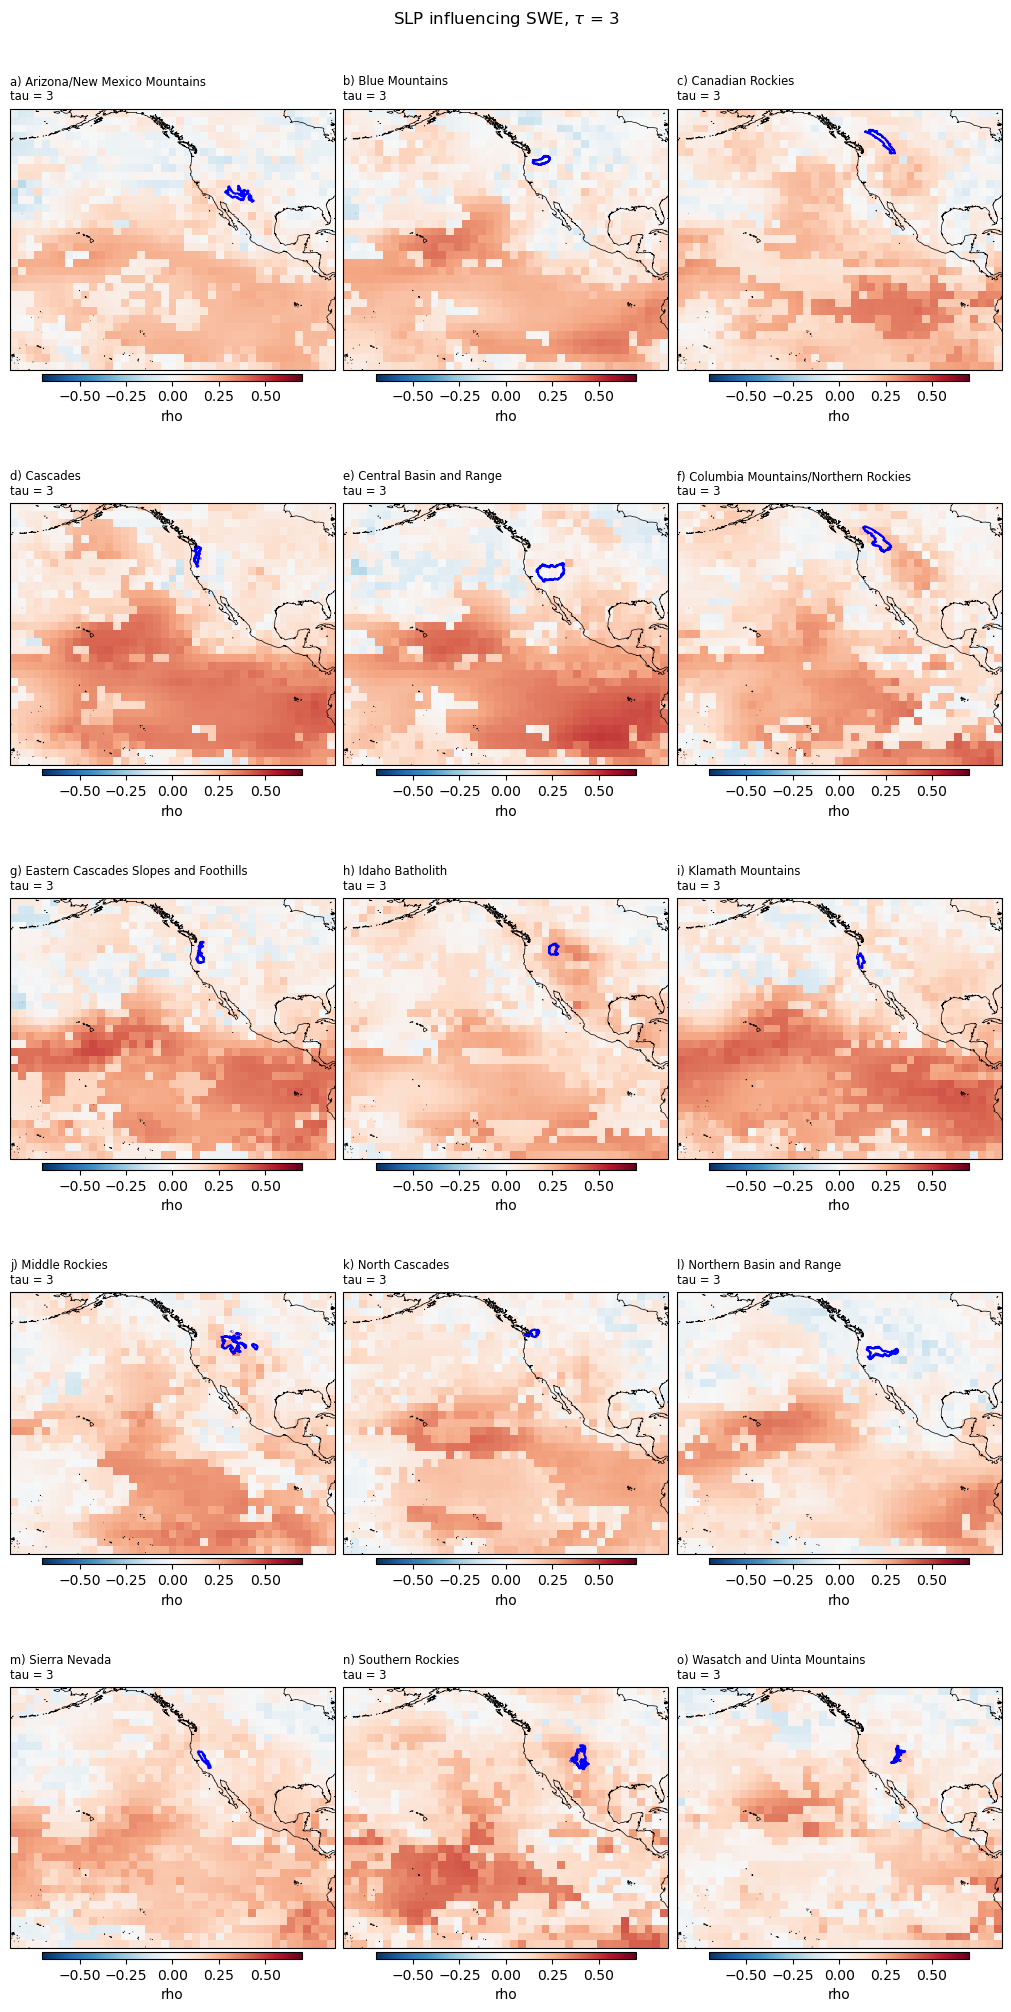

In [28]:
# def plot_ccm(f):
f = ccm_results_flist[1]

lag = f.split('_')[3].split('.')[0]
ccm_xr = xr.open_dataset(f)
fig = plt.figure(figsize=(10, 20), constrained_layout=True)
# create gridspec
gs = fig.add_gridspec(5,3, height_ratios=[1,1,1,1,1],
                      width_ratios=[1,1,1])

cbar_kwargs = {'shrink':0.8, 'aspect':40,
               'orientation':'horizontal', 'pad':0.01}

for i in range(15):
    eco_name = str(ccm_xr.isel(eco_region=i).eco_region.values)
    sub = wus_eco[wus_eco['NA_L3NAME']==eco_name]
    
    ax = fig.add_subplot(gs[i],
                         projection=ccrs.PlateCarree(central_longitude=180))
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)
    ccm_xr.isel(eco_region=i).rho.plot(ax=ax,                                       
                                       cmap='RdBu_r',
                                       vmin=-0.7, vmax=0.7,
                                       transform=ccrs.PlateCarree(),
                                       cbar_kwargs=cbar_kwargs)
    sub.boundary.plot(ax=ax, color='b')
    ax.set_title('')
    ax.set_title('{}) {}\ntau = {}'.format(alc[i], eco_name, lag), loc='left', fontsize='small')
plt.suptitle(fr'SLP influencing SWE, $\tau$ = {lag}')
plt.savefig('./figs/ccm_slp_swe_lag3.png', bbox_inches='tight', facecolor='w')
plt.show()

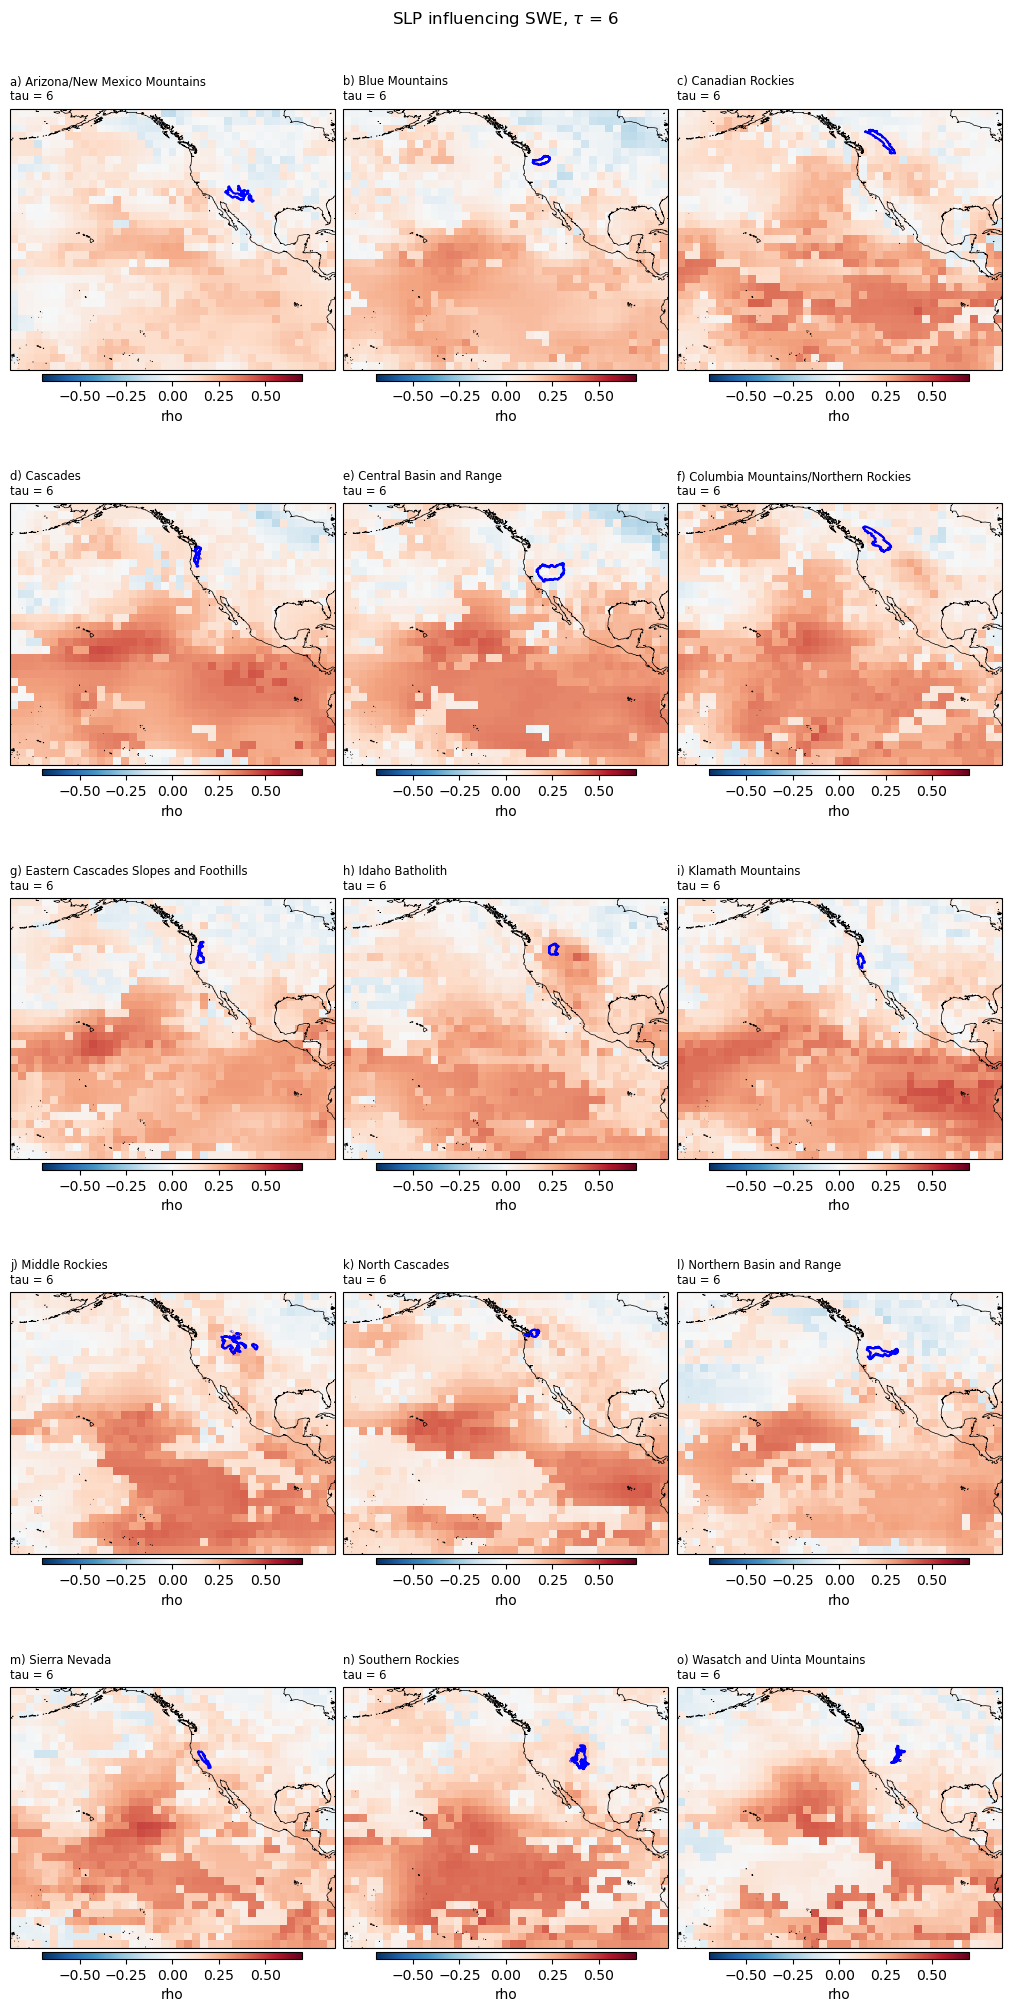

In [29]:
# def plot_ccm(f):
f = ccm_results_flist[2]

lag = f.split('_')[3].split('.')[0]
ccm_xr = xr.open_dataset(f)
fig = plt.figure(figsize=(10, 20), constrained_layout=True)
# create gridspec
gs = fig.add_gridspec(5,3, height_ratios=[1,1,1,1,1],
                      width_ratios=[1,1,1])

cbar_kwargs = {'shrink':0.8, 'aspect':40,
               'orientation':'horizontal', 'pad':0.01}

for i in range(15):
    eco_name = str(ccm_xr.isel(eco_region=i).eco_region.values)
    sub = wus_eco[wus_eco['NA_L3NAME']==eco_name]
    
    ax = fig.add_subplot(gs[i],
                         projection=ccrs.PlateCarree(central_longitude=180))
    ax.coastlines(resolution='50m', color='black', linewidth=0.5)
    ccm_xr.isel(eco_region=i).rho.plot(ax=ax,                                       
                                       cmap='RdBu_r',
                                       vmin=-0.7, vmax=0.7,
                                       transform=ccrs.PlateCarree(),
                                       cbar_kwargs=cbar_kwargs)
    sub.boundary.plot(ax=ax, color='b')
    ax.set_title('')
    ax.set_title('{}) {}\ntau = {}'.format(alc[i], eco_name, lag), loc='left', fontsize='small')
plt.suptitle(fr'SLP influencing SWE, $\tau$ = {lag}')
plt.savefig('./figs/ccm_slp_swe_lag6.png', bbox_inches='tight', facecolor='w')
plt.show()

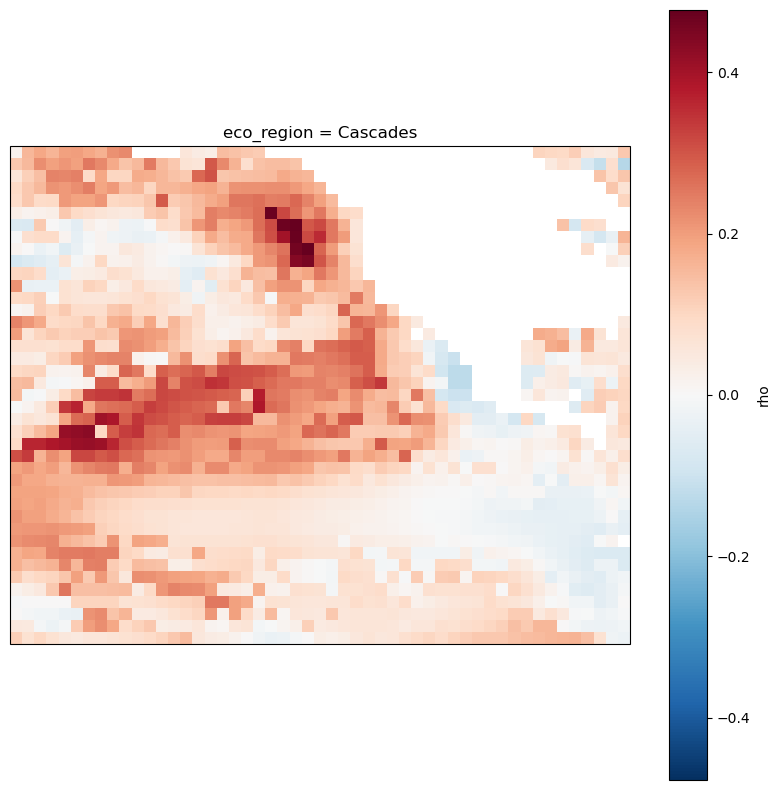

In [10]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# ax.coastlines(resolution='50m', color='black', linewidth=1)

# ax.set_extent([0, 360, -60, 60], crs=ccrs.PlateCarree())
ccm_xr.isel(eco_region=3).rho.plot(ax=ax, transform=ccrs.PlateCarree())

In [11]:
ccm_xr.isel(eco_region=0)

<xarray.Dataset>
Dimensions:     (lat: 41, lon: 51)
Coordinates:
    eco_region  <U28 'Arizona/New Mexico Mountains'
  * lat         (lat) float64 -20.0 -18.0 -16.0 -14.0 ... 54.0 56.0 58.0 60.0
  * lon         (lon) float64 180.0 182.0 184.0 186.0 ... 276.0 278.0 280.0
Data variables:
    rho         (lat, lon) float64 ...

In [24]:
str(ccm_xr.isel(eco_region=0).eco_region.values)

'Arizona/New Mexico Mountains'

In [25]:
wus_eco

,NA_L3CODE,NA_L3NAME,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,NA_L3KEY,NA_L2KEY,NA_L1KEY,Shape_Leng,Shape_Area,geometry
61,10.1.3,Northern Basin and Range,10.1,COLD DESERTS,10,NORTH AMERICAN DESERTS,10.1.3 Northern Basin and Range,10.1 COLD DESERTS,10 NORTH AMERICAN DESERTS,4.208601e+06,1.419879e+11,"POLYGON ((-120.885 43.935, -120.882 43.934, -1..."
63,10.1.5,Central Basin and Range,10.1,COLD DESERTS,10,NORTH AMERICAN DESERTS,10.1.5 Central Basin and Range,10.1 COLD DESERTS,10 NORTH AMERICAN DESERTS,4.409188e+06,3.096810e+11,"POLYGON ((-118.296 41.919, -118.287 41.921, -1..."
142,13.1.1,Arizona/New Mexico Mountains,13.1,UPPER GILA MOUNTAINS,13,TEMPERATE SIERRAS,13.1.1 Arizona/New Mexico Mountains,13.1 UPPER GILA MOUNTAINS,13 TEMPERATE SIERRAS,7.988777e+05,1.201701e+10,"POLYGON ((-105.623 33.964, -105.621 33.964, -1..."
143,13.1.1,Arizona/New Mexico Mountains,13.1,UPPER GILA MOUNTAINS,13,TEMPERATE SIERRAS,13.1.1 Arizona/New Mexico Mountains,13.1 UPPER GILA MOUNTAINS,13 TEMPERATE SIERRAS,1.148073e+05,5.378117e+08,"POLYGON ((-107.171 34.124, -107.169 34.123, -1..."
144,13.1.1,Arizona/New Mexico Mountains,13.1,UPPER GILA MOUNTAINS,13,TEMPERATE SIERRAS,13.1.1 Arizona/New Mexico Mountains,13.1 UPPER GILA MOUNTAINS,13 TEMPERATE SIERRAS,6.512928e+04,2.295973e+08,"POLYGON ((-105.756 34.274, -105.755 34.274, -1..."
145,13.1.1,Arizona/New Mexico Mountains,13.1,UPPER GILA MOUNTAINS,13,TEMPERATE SIERRAS,13.1.1 Arizona/New Mexico Mountains,13.1 UPPER GILA MOUNTAINS,13 TEMPERATE SIERRAS,1.135063e+05,4.358625e+08,"POLYGON ((-107.731 34.975, -107.731 34.975, -1..."
146,13.1.1,Arizona/New Mexico Mountains,13.1,UPPER GILA MOUNTAINS,13,TEMPERATE SIERRAS,13.1.1 Arizona/New Mexico Mountains,13.1 UPPER GILA MOUNTAINS,13 TEMPERATE SIERRAS,3.437785e+05,2.518840e+09,"POLYGON ((-106.087 35.279, -106.087 35.278, -1..."
147,13.1.1,Arizona/New Mexico Mountains,13.1,UPPER GILA MOUNTAINS,13,TEMPERATE SIERRAS,13.1.1 Arizona/New Mexico Mountains,13.1 UPPER GILA MOUNTAINS,13 TEMPERATE SIERRAS,2.904664e+05,2.268758e+09,"POLYGON ((-108.524 35.469, -108.519 35.469, -1..."
148,13.1.1,Arizona/New Mexico Mountains,13.1,UPPER GILA MOUNTAINS,13,TEMPERATE SIERRAS,13.1.1 Arizona/New Mexico Mountains,13.1 UPPER GILA MOUNTAINS,13 TEMPERATE SIERRAS,2.423601e+05,2.164530e+09,"POLYGON ((-107.199 35.486, -107.198 35.485, -1..."
149,13.1.1,Arizona/New Mexico Mountains,13.1,UPPER GILA MOUNTAINS,13,TEMPERATE SIERRAS,13.1.1 Arizona/New Mexico Mountains,13.1 UPPER GILA MOUNTAINS,13 TEMPERATE SIERRAS,2.498678e+06,8.302536e+10,"POLYGON ((-112.019 35.949, -111.996 35.947, -1..."


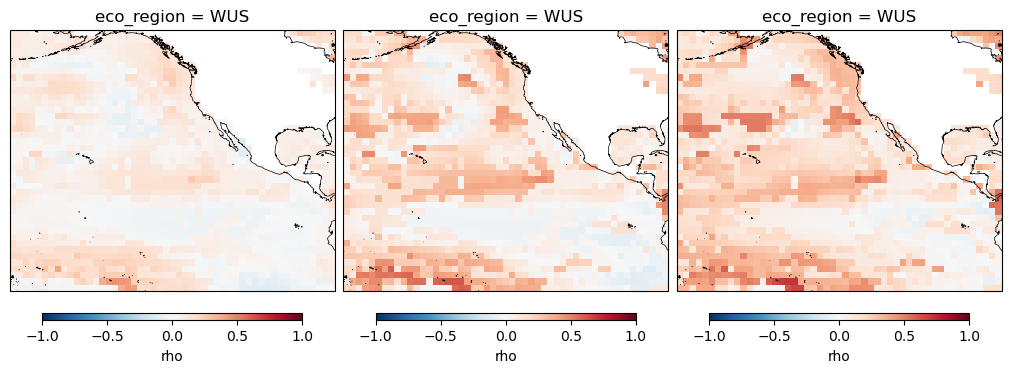

In [37]:
wus_ccm_sst_xr_lag1 = xr.open_dataset('./data/processed/ccm_wus_SST_tau_1.nc')
wus_ccm_sst_xr_lag3 = xr.open_dataset('./data/processed/ccm_wus_SST_tau_3.nc')
wus_ccm_sst_xr_lag6 = xr.open_dataset('./data/processed/ccm_wus_SST_tau_6.nc')

fig = plt.figure(figsize=(10, 20), constrained_layout=True)
# create gridspec
gs = fig.add_gridspec(1,3,
                      width_ratios=[1,1,1])

ax1 = fig.add_subplot(gs[0],
                     projection=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines(resolution='50m', color='black', linewidth=0.5)
wus_ccm_sst_xr_lag1.rho.plot(ax=ax1,                                       
                             cmap='RdBu_r',
                             vmin=-1, vmax=1,
                             transform=ccrs.PlateCarree(),
                             cbar_kwargs=cbar_kwargs)

ax2 = fig.add_subplot(gs[1],
                     projection=ccrs.PlateCarree(central_longitude=180))
ax2.coastlines(resolution='50m', color='black', linewidth=0.5)
wus_ccm_sst_xr_lag3.rho.plot(ax=ax2,                                       
                             cmap='RdBu_r',
                             vmin=-1, vmax=1,
                             transform=ccrs.PlateCarree(),
                             cbar_kwargs=cbar_kwargs)

ax3 = fig.add_subplot(gs[2],
                     projection=ccrs.PlateCarree(central_longitude=180))
ax3.coastlines(resolution='50m', color='black', linewidth=0.5)
wus_ccm_sst_xr_lag6.rho.plot(ax=ax3,                                       
                             cmap='RdBu_r',
                             vmin=-1.0, vmax=1.0,
                             transform=ccrs.PlateCarree(),
                             cbar_kwargs=cbar_kwargs)

In [38]:
wus_ccm_sst_xr_lag1

<xarray.Dataset>
Dimensions:          (eco_region: 1, lat: 41, lon: 51)
Coordinates:
  * eco_region       (eco_region) object 'WUS'
  * lat              (lat) float64 -20.0 -18.0 -16.0 -14.0 ... 56.0 58.0 60.0
  * lon              (lon) float64 180.0 182.0 184.0 186.0 ... 276.0 278.0 280.0
Data variables:
    embed dims       (eco_region, lat, lon) float64 ...
    rho              (eco_region, lat, lon) float64 ...
    slope (last 20)  (eco_region, lat, lon) float64 ...
    rho reverse      (eco_region, lat, lon) float64 ...